In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table,Column
import astropy.units as u
import scipy.integrate as integrate


import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('.'), '..')))

import fitIR
import fitIR.models as models
import fitIR.analyse as analyse

import pickle

In [2]:
def irregular_trapz(x,y):
    tot = 0
    for n in range(len(x)-1):
        dx = x[n+1] - x[n]
        ybar = (y[n+1] + y[n])/2
        tot = tot + ybar*dx
    return(tot)

In [3]:
f = open('/lustre/scratch/astro/im281/cigalon/cigale-cigalon/database_builder/filters/spire_250.dat')
wave = []
transmission = []
for line in f:
    
    line = line.split()
    try:
        float(line[0])
    except:
        continue
    wave.append(float(line[0]))
    transmission.append(float(line[1]))
wave = np.array(wave)/1E4
spire_250 = [wave,np.array(transmission)]

f = open('/lustre/scratch/astro/im281/cigalon/cigale-cigalon/database_builder/filters/spire_350.dat')
wave = []
transmission = []
for line in f:
    
    line = line.split()
    try:
        float(line[0])
    except:
        continue
    wave.append(float(line[0]))
    transmission.append(float(line[1]))
wave = np.array(wave)/1E4
spire_350 = [wave,np.array(transmission)]

f = open('/lustre/scratch/astro/im281/cigalon/cigale-cigalon/database_builder/filters/spire_500.dat')
wave = []
transmission = []
for line in f:
    
    line = line.split()
    try:
        float(line[0])
    except:
        continue
    wave.append(float(line[0]))
    transmission.append(float(line[1]))
wave = np.array(wave)/1E4
spire_500 = [wave,np.array(transmission)]

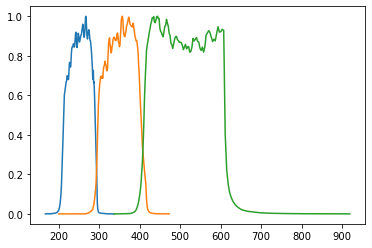

In [4]:
plt.plot(spire_250[0],spire_250[1])

plt.plot(spire_350[0],spire_350[1])

plt.plot(spire_500[0],spire_500[1])
plt.show()

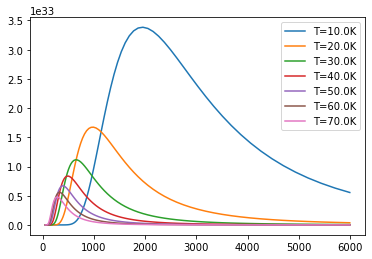

In [6]:
temperature = np.arange(10,70.1,10)
for T in temperature:
    prior = {}
    prior['z'] = 5.0
    prior['log10LIR'] = 12.0  
    prior['T'] = T
    prior['emissivity'] = 1.5

    source = models.greybody(prior)
    val = np.linspace(np.log10(3E8/8E-6),np.log10(3E8/1E-3),100)
    val = 10**val
    nu,lnu = source.generate_greybody(val,5)
    wave = 3E8/nu*1E6

    plt.plot(wave,lnu,label='T={}K'.format(T))
plt.legend()
plt.show()

In [7]:
val/nu

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

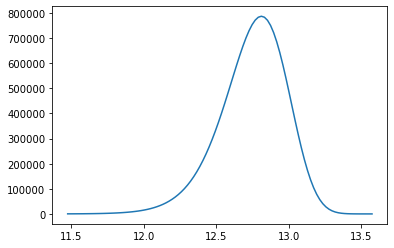

In [8]:
val = np.linspace(np.log10(3E8/8E-6),np.log10(3E8/1E-3),100)
val = 10**val
flux = source.lnu(val)

plt.plot(np.log10(val),flux)
plt.show()

In [10]:
val = np.linspace(np.log10(3E8/8E-6),np.log10(3E8/1E-3),100)
val = 10**val
loglir = np.arange(9,13,1)

for lir in loglir:
    
    prior = {}
    prior['z'] = 1
    prior['log10LIR'] = lir 
    prior['T'] = 20
    prior['emissivity'] = 1.5

    source = models.greybody(prior)
    
    nu,lnu = source.generate_greybody(val,0.01)
    wave = 3E8/nu*1E6
    
    x = val
    x,y = source.generate_greybody(val,1)
            
    L_250 = np.interp(spire_250[0],wave,lnu)*spire_250[1]
    tot_250 = np.trapz(spire_250[0]/1E4,y*((spire_250[0]/1E4)**2/3E8))
    print(tot_250)
            
    
    plt.plot(np.log10(x),y,label='lir={}'.format(lir))
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (100,) (302,) 

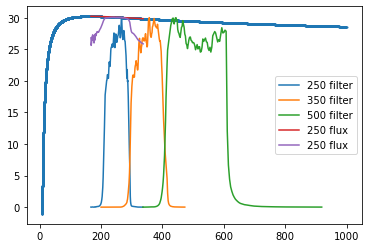

In [12]:
val = np.linspace(np.log10(3E8/8E-6),np.log10(3E8/1E-3),10000)
val = 10**val
nu,lnu = source.generate_greybody(val,0)
wave = 3E8/nu*1E6
lwave = lnu

plt.scatter(wave,np.log10(lnu),s=1)

plt.plot(spire_250[0],spire_250[1]*30,label='250 filter')
plt.plot(spire_350[0],spire_350[1]*30,label='350 filter')
plt.plot(spire_500[0],spire_500[1]*30,label='500 filter')

y = np.interp(spire_250[0],wave,lnu)*spire_250[1]
plt.plot(spire_250[0],np.log10(y/spire_250[1]),label='250 flux')
plt.plot(spire_250[0],np.log10(y),label='250 flux')
plt.legend()
plt.show()

In [13]:
wave

array([   8.        ,    8.00386397,    8.00772981, ...,  999.03470687,
        999.51723691, 1000.        ])

In [14]:
dx = spire_250[0][1]/1E4 - spire_250[0][0]/1E4
np.trapz(spire_250[0]/1E4,y*((spire_250[0]/1E4)**2/3E8))

-1.6621317276162548e+16

In [15]:
irregular_trapz(spire_250[0]/1E4,y*((spire_250[0]/1E4)**2/3E8))*-1

-1.6620616536299946e+16

In [16]:
val = np.linspace(np.log10(3E8/8E-6),np.log10(3E8/1E-3),1000)
val = 10**val

totlir = np.arange(9,13.1,1)
redshift = np.arange(0.01,5.01,0.25)
temperature = np.arange(10,70,10)

measured_250 = []
measured_350 = []
measured_500 = []
for i,lir in enumerate(totlir):
    temp_lir_250 = []
    temp_lir_350 = []
    temp_lir_500 = []
    for j,z in enumerate(redshift): #loop over redshift
        temp_red_250 = []
        temp_red_350 = []
        temp_red_500 = []
        for k,T in enumerate(temperature): #loop over temperature
        
            prior = {}
            prior['z'] = z
            prior['log10LIR'] = lir 
            prior['T'] = T
            prior['emissivity'] = 1.5

            source = models.greybody(prior)
            
            nu,lnu = source.generate_greybody(val,z)
            wave = 3E8/nu*1E6
            dist = cosmo.luminosity_distance(z).to(u.cm).value
            
            L_250 = np.interp(spire_250[0],wave,lnu)*spire_250[1]
            tot_250 = np.trapz(spire_250[0],L_250*((spire_250[0])**2/3E8))
            temp_red_250.append((1+z)*tot_250/(4*np.pi*dist**2))
            
            L_350 = np.interp(spire_350[0],wave,lnu)*spire_350[1]
            tot_350 = np.trapz(spire_350[0],L_350*((spire_350[0])**2/3E8))
            temp_red_350.append((1+z)*tot_350/(4*np.pi*dist**2))
            
            L_500 = np.interp(spire_500[0],wave,lnu)*spire_500[1]
            tot_500 = np.trapz(spire_500[0],L_500*((spire_500[0])**2/3E8))
            
            dist = cosmo.luminosity_distance(z).to(u.cm).value
            temp_red_500.append((1+z)*tot_500/(4*np.pi*dist**2))
        temp_lir_250.append(temp_red_250)
        temp_lir_350.append(temp_red_350)
        temp_lir_500.append(temp_red_500)
    measured_250.append(temp_lir_250)
    measured_350.append(temp_lir_350)
    measured_500.append(temp_lir_500)
measured_250 = np.array(measured_250)
measured_350 = np.array(measured_350)
measured_500 = np.array(measured_500)

In [21]:
val = np.linspace(np.log10(3E8/8E-6),np.log10(3E8/1E-3),1000)
val = 10**val

totlir = np.arange(9,13.1,1)
redshift = np.arange(0.01,5.01,0.25)
temperature = np.arange(10,70,10)

measured_250 = []
measured_350 = []
measured_500 = []
for i,lir in enumerate(totlir):
    temp_lir_250 = []
    temp_lir_350 = []
    temp_lir_500 = []
    for j,z in enumerate(redshift): #loop over redshift
        temp_red_250 = []
        temp_red_350 = []
        temp_red_500 = []
        for k,T in enumerate(temperature): #loop over temperature
        
            prior = {}
            prior['z'] = z
            prior['log10LIR'] = lir 
            prior['T'] = T
            prior['emissivity'] = 1.5

            source = models.greybody(prior)
            
            nu,lnu = source.generate_greybody(val,z)
            wave = 3E8/nu*1E6
            dist = cosmo.luminosity_distance(z).to(u.cm).value
            
            L_250 = np.interp(spire_250[0],wave,lnu)*spire_250[1]
            tot_250 = np.trapz(spire_250[0],L_250*((spire_250[0])**2/3E8))
            temp_red_250.append(tot_250)
            
            L_350 = np.interp(spire_350[0],wave,lnu)*spire_350[1]
            tot_350 = np.trapz(spire_350[0],L_350*((spire_350[0])**2/3E8))
            temp_red_350.append(tot_350)
            
            L_500 = np.interp(spire_500[0],wave,lnu)*spire_500[1]
            tot_500 = np.trapz(spire_500[0],L_500*((spire_500[0])**2/3E8))
            
            dist = cosmo.luminosity_distance(z).to(u.cm).value
            temp_red_500.append(tot_500)
        temp_lir_250.append(temp_red_250)
        temp_lir_350.append(temp_red_350)
        temp_lir_500.append(temp_red_500)
    measured_250.append(temp_lir_250)
    measured_350.append(temp_lir_350)
    measured_500.append(temp_lir_500)
measured_250 = np.array(measured_250)
measured_350 = np.array(measured_350)
measured_500 = np.array(measured_500)

In [28]:
measured_250.shape

(5, 20, 6)

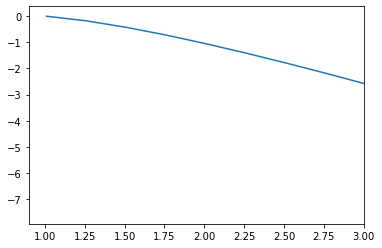

In [27]:
x = redshift+1
y = np.log10(measured_250[0,:,0]/measured_250[0,0,0])
plt.plot(x,y)
plt.xlim(0.9,3)
plt.show()

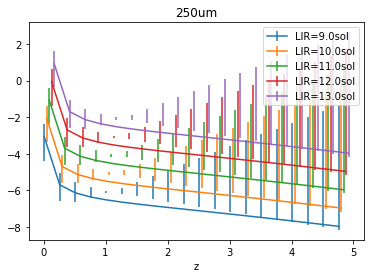

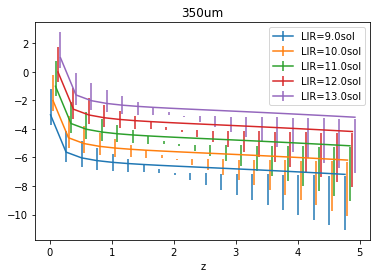

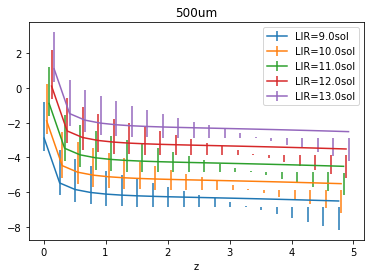

In [17]:
u_y = (np.log10(measured_250[:,:,-1]*-1) - np.log10(measured_250[:,:,3]*-1))*-1
l_y = (np.log10(measured_250[:,:,3]*-1) - np.log10(measured_250[:,:,0]*-1))*-1
for n,lir in enumerate(totlir):
    
    y = np.log10(measured_250[n,:,3]*-1)+23
    x = redshift
    #plt.plot(x,y,label='LIR={}sol'.format(lir))
    plt.errorbar(x+n/25,y,yerr=[l_y[n],u_y[n]],label='LIR={}sol'.format(lir))
plt.legend()
plt.title('250um')
plt.xlabel('z')
plt.show()

u_y = np.log10(measured_350[:,:,-1]*-1) - np.log10(measured_350[:,:,3]*-1)
l_y = np.log10(measured_350[:,:,3]*-1) - np.log10(measured_350[:,:,0]*-1)
for n,lir in enumerate(totlir):
    
    y = np.log10(measured_350[n,:,3]*-1)+23
    x = redshift
    #plt.plot(x,y,label='LIR={}sol'.format(lir))
    plt.errorbar(x+n/25,y,yerr=[l_y[n],u_y[n]],label='LIR={}sol'.format(lir))
plt.legend()
plt.title('350um')
plt.xlabel('z')
plt.show()

u_y = np.log10(measured_500[:,:,-1]*-1) - np.log10(measured_500[:,:,3]*-1)
l_y = np.log10(measured_500[:,:,3]*-1) - np.log10(measured_500[:,:,0]*-1)
for n,lir in enumerate(totlir):
    
    y = np.log10(measured_500[n,:,3]*-1)+23
    x = redshift
    #plt.plot(x,y,label='LIR={}sol'.format(lir))
    plt.errorbar(x+n/25,y,yerr=[l_y[n],u_y[n]],label='LIR={}sol'.format(lir))
plt.legend()
plt.title('500um')
plt.xlabel('z')
plt.show()

In [18]:
u_y

array([[-0.73382304, -0.71777551, -0.70115547, -0.68398845, -0.6663    ,
        -0.64811968, -0.62947556, -0.61039914, -0.59091979, -0.57106751,
        -0.55087412, -0.53036668, -0.5095741 , -0.48852539, -0.46724364,
        -0.44575594, -0.42408286, -0.40224859, -0.3802726 , -0.35817249],
       [-0.73382304, -0.71777551, -0.70115547, -0.68398845, -0.6663    ,
        -0.64811968, -0.62947556, -0.61039914, -0.59091979, -0.57106751,
        -0.55087412, -0.53036668, -0.5095741 , -0.48852539, -0.46724364,
        -0.44575594, -0.42408286, -0.40224859, -0.3802726 , -0.35817249],
       [-0.73382304, -0.71777551, -0.70115547, -0.68398845, -0.6663    ,
        -0.64811968, -0.62947556, -0.61039914, -0.59091979, -0.57106751,
        -0.55087412, -0.53036668, -0.5095741 , -0.48852539, -0.46724364,
        -0.44575594, -0.42408286, -0.40224859, -0.3802726 , -0.35817249],
       [-0.73382304, -0.71777551, -0.70115547, -0.68398845, -0.6663    ,
        -0.64811968, -0.62947556, -0.61039914, -

In [19]:
q = 2.6
radlum = np.log10(10**totlir*3.8E26/3.75E12) - q
radflux = []
for z in redshift:

    alpha = -0.8
    dist = cosmo.luminosity_distance(z).to(u.m).value
    radflux.append(10**radlum/(4*np.pi*dist**2)*(1+z)**(1+alpha) * (0.15/1.4)**alpha)
radflux = np.array(radflux)/1E-26

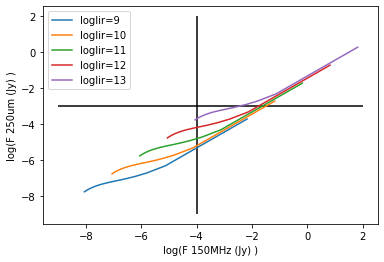

In [20]:
for n in range(5):
    x = np.log10(radflux[:,n])
    y = (np.log10(measured_250[n,:,5]*-1)+23)
    plt.plot(x,y,label='loglir={}'.format(n+9))
    

    
plt.vlines(-4,ymin=-9,ymax=2)
plt.hlines(-3,xmin=-9,xmax=2)

plt.xlabel('log(F 150MHz (Jy) )')
plt.ylabel('log(F 250um (Jy) )')
plt.legend()
plt.show()

In [72]:
x

array([6.69948712e-03, 6.69948712e-02, 6.69948712e-01, 6.69948712e+00,
       6.69948712e+01])

In [74]:
y

array([-8.78484255e-23, -1.16987146e-25, -2.87976850e-26, -1.26804771e-26,
       -7.16207054e-27, -4.64779786e-27, -3.29371499e-27, -2.47927888e-27,
       -1.94944968e-27, -1.58401156e-27, -1.32030793e-27, -1.12306396e-27,
       -9.71168621e-28, -8.51344176e-28, -7.54888839e-28, -6.75898734e-28])